<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/100Resistores_390kOhms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy import stats


In [2]:
#Valor nominal ou do fabricante
R_ref= 39.0 #(10kΩ) ou 

In [3]:
##Exemplo: Medidas dos 100 resistores de 890 ± 5% (kΩ)

#array_100 = [388.0,387.0,386.0,391.0,388.0,394.0,396.0,387.0,387.0,386.0,393.0,387.0,396.0,390.0,391.0,386.0,390.0,392.0,391.0,387.0,387.0,386.0,394.0,392.0,388.0,385.0,393.0,394.0,389.0,386.0,388.0,388.0,393.0,387.0,386.0,389.0,386.0,388.0,386.0,388.0,384.0,389.0,391.0,392.0,388.0,390.0,389.0,389.0,392.0,394.0,390.0,387.0,390.0,386.0,383.0,386.0,385.0,394.0,392.0,386.0,386.0,391.0,388.0,388.0,387.0,388.0,386.0,388.0,384.0,388.0,386.0,394.0,389.0,391.0,394.0,384.0,384.0,389.0,384.0,387.0,388.0,388.0,391.0,382.0,384.0,394.0,386.0,388.0,392.0,389.0,390.0,387.0,382.0,386.0,388.0,393.0,390.0,387.0,387.0,394.0]
array_GR01 = [38.80,38.70,38.60,39.10,38.80,39.40,39.60,38.70,38.70,38.60,39.30,38.70,39.60,39.00,39.10,38.60,39.00,39.20,39.10,38.70] #(10k ohms)
array_GR02 = [38.70,38.60,39.40,39.20,38.80,38.50,39.30,39.40,38.90,38.60,38.80,38.80,39.30,38.70,38.60,38.90,38.60,38.80,38.60,38.80] #(10k ohms)
array_GR03 = [38.40,38.90,39.10,39.20,38.80,39.00,38.90,38.90,39.20,39.40,39.00,38.70,39.00,38.60,38.30,38.60,38.50,39.40,39.20,38.60] #(10k ohms)
array_GR04 = [38.60,39.10,38.80,38.80,38.70,38.80,38.60,38.80,38.40,38.80,38.60,39.40,38.90,39.10,39.40,38.40,38.40,38.90,38.40,38.70] #(10k ohms)
array_GR05 = [38.80,38.80,39.10,38.20,38.40,39.40,38.60,38.80,39.20,38.90,39.00,38.70,38.20,38.60,38.80,39.30,39.00,38.70,38.70,39.40] #(10k ohms)
array_100 = (array_GR01)+(array_GR02)+(array_GR03)+(array_GR04)+(array_GR05)#(10k ohms)


In [4]:
#array_100

In [5]:
def compatibilidade(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-np.mean(array_100))/ec
  if d<=2.0:
    print("Compatível", d, ec, abs(np.mean(grupo)-np.mean(array_100)))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,ec, abs(np.mean(grupo)-np.mean(array_100)))
  else:
    print("Incompatível", d,ec,abs(np.mean(grupo)-np.mean(array_100)))
  return(d)

In [6]:
def compatibilidadeRef(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  #egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  #ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-R_ref)/e100
  if d<=2.0:
    print("Compatível", d, e100, abs(np.mean(grupo)-R_ref))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,e100, abs(np.mean(grupo)-R_ref))
  else:
    print("Incompatível", d,e100,abs(np.mean(grupo)-R_ref))
  return(d)

In [7]:
#Funções (Ref. Manoel Miguel)

def estimativasGerais(grupo):
  print (f"Média {np.mean(grupo)}")
  print (f"Desvio Padrão NP (POP) {np.std(grupo, ddof=0)}")
  print (f"Desvio Padrão NP (EXP) {np.std(grupo, ddof=1)}")
  print (f"Desvio Padrão {desvioPadrao(grupo)}")
  print (f"Desvio Padrão Experimental {desvioPadraoExp(grupo)}")


def plotaGrafrico(grupo):
    fig = plt.figure( figsize=(8,6) )
    counts, bins, _ = plt.hist(grupo, bins=20, range=[np.min(grupo),np.max(grupo)])
    plt.xlabel('Resistência (10kΩ)',fontsize=18)
    plt.ylabel('Frequência',fontsize=18)
    plt.title('Histograma',fontsize=12 )
    plt.show()
    

def erroDaMedia(grupo):
  sigma_mx = np.std(grupo, ddof=1)/np.sqrt(len(grupo))
  return(sigma_mx)


def EstimativaPadrao(grupo): 
  print(f"x = {np.mean(grupo)} ± {erroDaMedia(grupo):.3f} 10kΩ")

def erroRelativo(grupo):
  erroRelativo = (erroDaMedia(grupo)/abs(np.mean(grupo)))
  print(f"{erroRelativo*100}%")

def desvioPadraoExp(grupo):
  sx = 0
  for elemento in grupo:
      sx += ((elemento - np.average(grupo))**2)/(len(grupo)-1)
  sx = np.sqrt(sx)
  return (sx)

def desvioPadrao(grupo):
  ox = 0
  for elemento in grupo:
      ox += ((elemento - np.average(grupo))**2)/(len(grupo))
  ox = np.sqrt(ox)
  return (ox)




#Para o conjunto completo de 100 medidas e para para cada conjunto de 20 

*   Histogramas
*   estimativa padrao
*   erro relativo


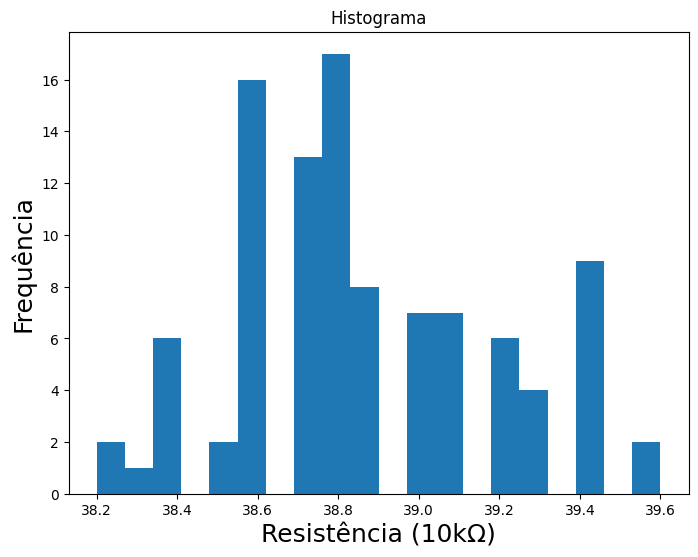

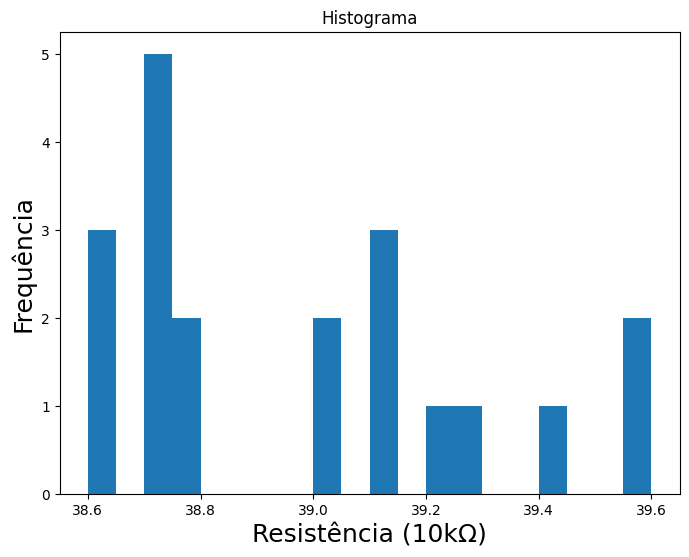

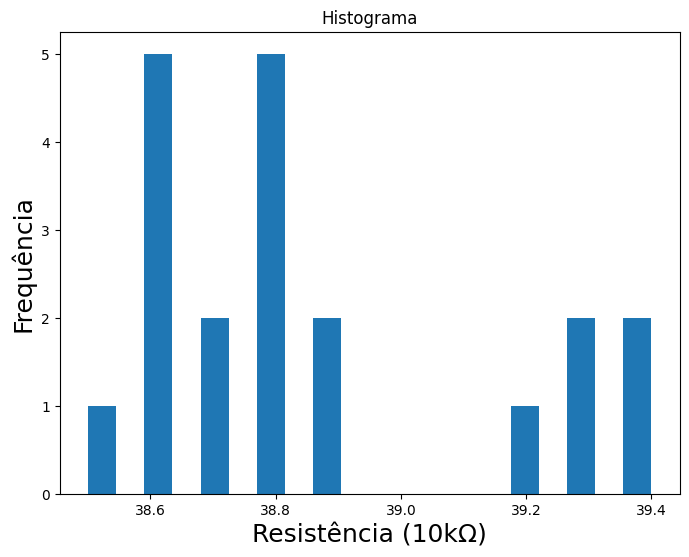

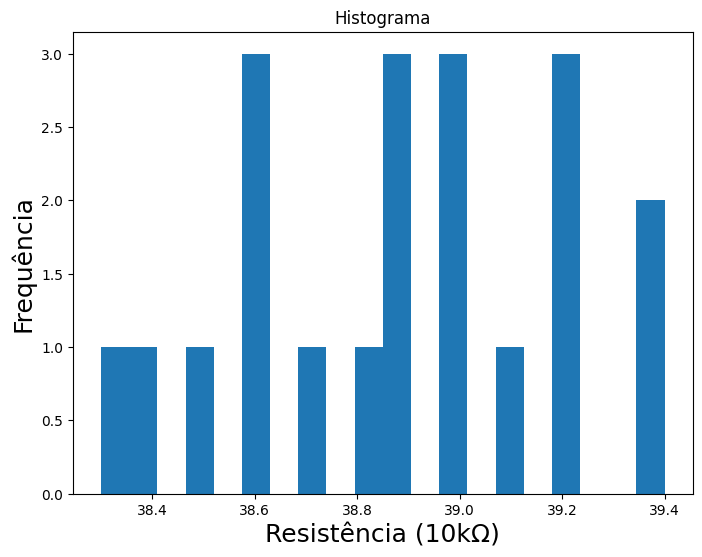

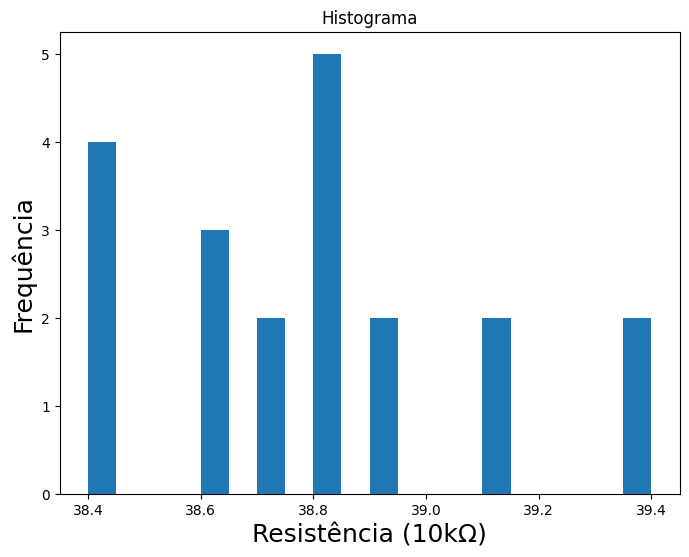

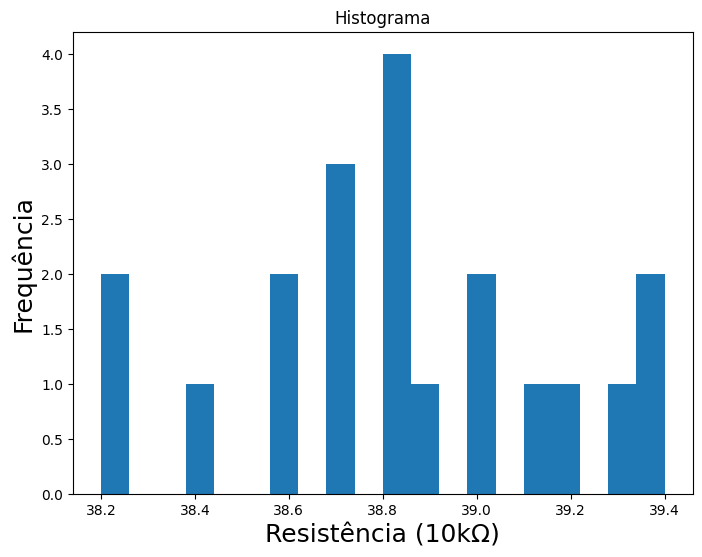

In [8]:
plotaGrafrico(array_100)
plotaGrafrico(array_GR01)
plotaGrafrico(array_GR02)
plotaGrafrico(array_GR03)
plotaGrafrico(array_GR04)
plotaGrafrico(array_GR05)

In [9]:
EstimativaPadrao(array_GR01)
EstimativaPadrao(array_GR02)
EstimativaPadrao(array_GR03)
EstimativaPadrao(array_GR04)
EstimativaPadrao(array_GR05)
EstimativaPadrao(array_100)


x = 38.965 ± 0.073 10kΩ
x = 38.864999999999995 ± 0.065 10kΩ
x = 38.885000000000005 ± 0.071 10kΩ
x = 38.78 ± 0.067 10kΩ
x = 38.83 ± 0.077 10kΩ
x = 38.864999999999995 ± 0.032 10kΩ


In [10]:
erroRelativo(array_100)
erroRelativo(array_GR01)
erroRelativo(array_GR02)
erroRelativo(array_GR03)
erroRelativo(array_GR04)
erroRelativo(array_GR05)

0.08147862258244343%
0.18736982228607915%
0.16828407370194945%
0.1830618554401899%
0.1720681844340444%
0.1995715503868178%


#Conjunto completo de valores de resistências (100):

In [11]:

amplitude_100=(np.max(array_100)-np.min(array_100))
print ( "Valor mínimo: {}".format( np.min(array_100) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_100) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_100 ) ,"(kΩ)")

Valor mínimo: 38.2 (kΩ)
Valor máximo: 39.6 (kΩ)
Amplitude: 1.3999999999999986 (kΩ)


In [12]:
#Calculo da média
N100=len(array_100)
media_100=(np.sum(array_100)/N100)
vmin = np.min(array_100)
vmax = np.max(array_100)
print("média do conjunto de 100 resistores: {}".format( (media_100)),"(kΩ)")

média do conjunto de 100 resistores: 38.864999999999995 (kΩ)


In [13]:
#Usando o NumPy
np.mean( array_100 )

38.864999999999995

In [14]:
print("média do conjunto de 100 resistores: {}".format(np.mean( array_100 )),"(kΩ)")



média do conjunto de 100 resistores: 38.864999999999995 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Conjunto Completo de 100 Resistores')

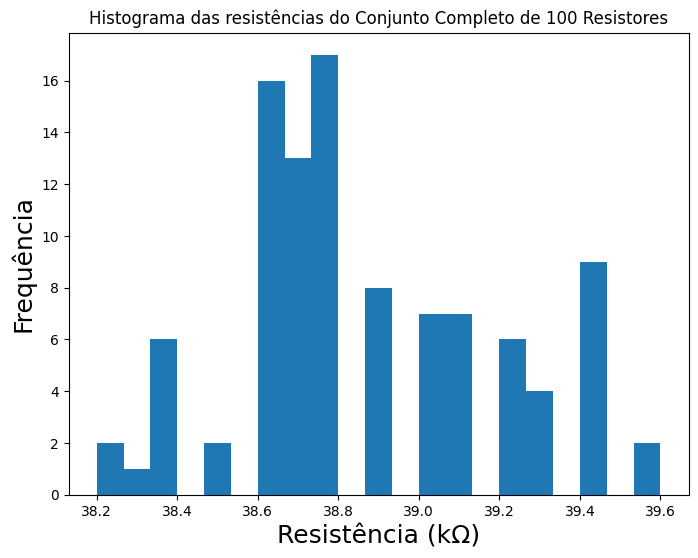

In [15]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_100, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Conjunto Completo de 100 Resistores', fontsize=12 )




Variância e desvio Padrão usando o NumPY:

In [16]:
var_100 = np.var( array_100, ddof=0 )
print ( "Variância do conj. de 100 resistores: {}".format(var_100),"(k^2Ω)" )
print ( "Desvio Padrao do conj. de 100 resistores: {}".format(np.sqrt(var_100)),"(kΩ)" )
sigma_m100 = np.std( array_100, ddof=0 )/np.sqrt(N100)
print ( "Erro da média do conj. de 100: {}".format(np.std( array_100, ddof=1 )/np.sqrt(N100)),"(kΩ)" )

Variância do conj. de 100 resistores: 0.09927499999999982 (k^2Ω)
Desvio Padrao do conj. de 100 resistores: 0.3150793550837627 (kΩ)
Erro da média do conj. de 100: 0.031666666666666635 (kΩ)


Estimativa Padrão dos 100 resistores:

In [17]:
print ( "R100 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_100 ), 1 ), np.round( sigma_m100, 1 ) ) )


R100 = 38.9 ± 0.0 (kΩ)


#Grupo 01 de valores de resistências:

In [18]:
amplitude_GR01=(np.max(array_GR01)-np.min(array_GR01))
print ( "Valor mínimo: {}".format( np.min(array_GR01) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR01) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR01 ) ,"(kΩ)")

Valor mínimo: 38.6 (kΩ)
Valor máximo: 39.6 (kΩ)
Amplitude: 1.0 (kΩ)


In [19]:
#Usando o NumPy
np.mean( array_GR01 )

38.965

In [20]:
#Calculo da média
N1_20=len(array_GR01)
media_GR01=(np.sum(array_GR01)/N1_20)
vmin = np.min(array_GR01)
vmax = np.max(array_GR01)

print("média do conjunto de 20 resistores do Grupo 01: {}".format( (media_GR01)),"(kΩ)")

média do conjunto de 20 resistores do Grupo 01: 38.965 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Grupo 01 de 20 Resistores')

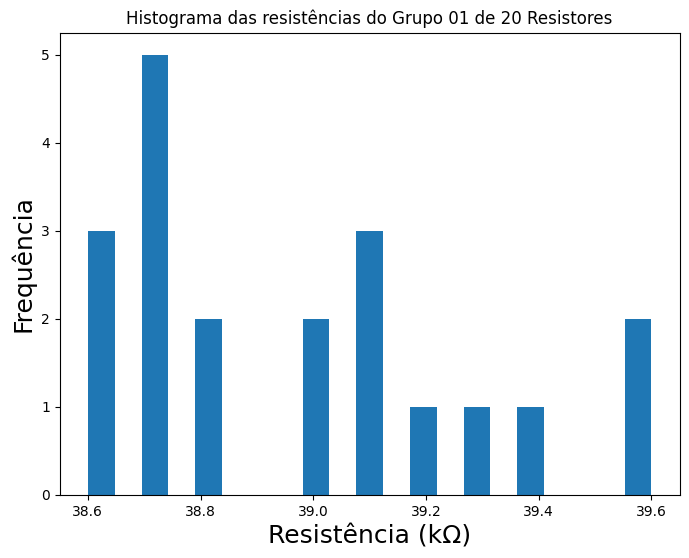

In [21]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR01, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 01 de 20 Resistores', fontsize=12 )


In [22]:
var_gr1 = np.var( array_GR01, ddof=1 )
print ( "Variância do Grupo 01: {}".format(var_gr1), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 01: {}".format(np.sqrt(var_gr1)),"(kΩ)" )
sigma_m1 = np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)
print ( "Erro da média do Grupo 01: {}".format(np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)),"(kΩ)" )

Variância do Grupo 01: 0.10660526315789444 (k^2Ω)
Desvio Padrao do do Grupo 01: 0.3265046142980133 (kΩ)
Erro da média do Grupo 01: 0.07300865125377075 (kΩ)


Estimativa Padrão GR01:

In [23]:
print ( "R1 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR01 ), 1 ), np.round( sigma_m1, 1 ) ) )


R1 = 39.0 ± 0.1 (kΩ)


#Grupo 02 de valores de resistências:

In [24]:
#Calculo da média
N2_20=len(array_GR02)
media_GR02=(np.sum(array_GR02)/N2_20)
vmin = np.min(array_GR02)
vmax = np.max(array_GR02)
amplitude_GR02=(np.max(array_GR02)-np.min(array_GR02))
print ( "Valor mínimo: {}".format( np.min(array_GR02) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR02) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR02 ) ,"(kΩ)")
print("média do conjunto de 20 resistores do Grupo 02: {}".format( (media_GR02)),"(kΩ)")

Valor mínimo: 38.5 (kΩ)
Valor máximo: 39.4 (kΩ)
Amplitude: 0.8999999999999986 (kΩ)
média do conjunto de 20 resistores do Grupo 02: 38.864999999999995 (kΩ)


In [25]:
#Usando o NumPy
np.mean( array_GR02 )

38.864999999999995

Text(0.5, 1.0, 'Histograma das resistências do Grupo 02 de 20 Resistores')

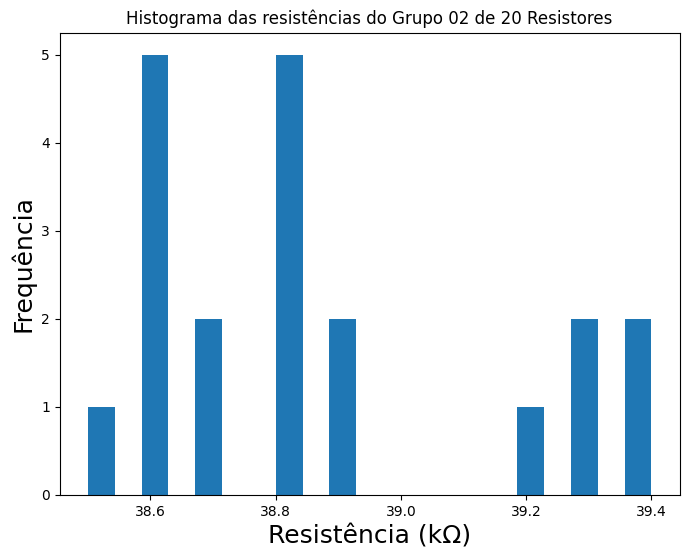

In [26]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR02, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 02 de 20 Resistores', fontsize=12 )


In [27]:
var_gr2 = np.var( array_GR02, ddof=1 )
print ( "Variância do Grupo 02: {}".format(var_gr2), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 02: {}".format(np.sqrt(var_gr2)),"(kΩ)" )
sigma_m2 = np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)
print ( "Erro da média do Grupo 02: {}".format(np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)),"(kΩ)" )

Variância do Grupo 02: 0.08555263157894683 (k^2Ω)
Desvio Padrao do do Grupo 02: 0.29249381459946605 (kΩ)
Erro da média do Grupo 02: 0.06540360524426264 (kΩ)


Estimativa Padrão GR02:

In [28]:
print ( "R2 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR02 ), 0 ), np.round( sigma_m2, 0 ) ) )


R2 = 39 ± 0 (kΩ)


#Grupo 03 de valores de resistências:

In [29]:
#Calculo da média
N3_20=len(array_GR03)
media_GR03=(np.sum(array_GR03)/N3_20)
vmin = np.min(array_GR03)
vmax = np.max(array_GR03)
amplitude_GR03=(np.max(array_GR03)-np.min(array_GR03))
print ( "Valor mínimo: {}".format( np.min(array_GR03) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR03) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR03 ),"(kΩ)" )
print("média do conjunto de 20 resistores do Grupo 03: {}".format( (media_GR03)),"(kΩ)")

Valor mínimo: 38.3 (kΩ)
Valor máximo: 39.4 (kΩ)
Amplitude: 1.1000000000000014 (kΩ)
média do conjunto de 20 resistores do Grupo 03: 38.885000000000005 (kΩ)


In [30]:
#Usando o NumPy
np.mean( array_GR03 )

38.885000000000005

Text(0.5, 1.0, 'Histograma das resistências do Grupo 03 de 20 Resistores')

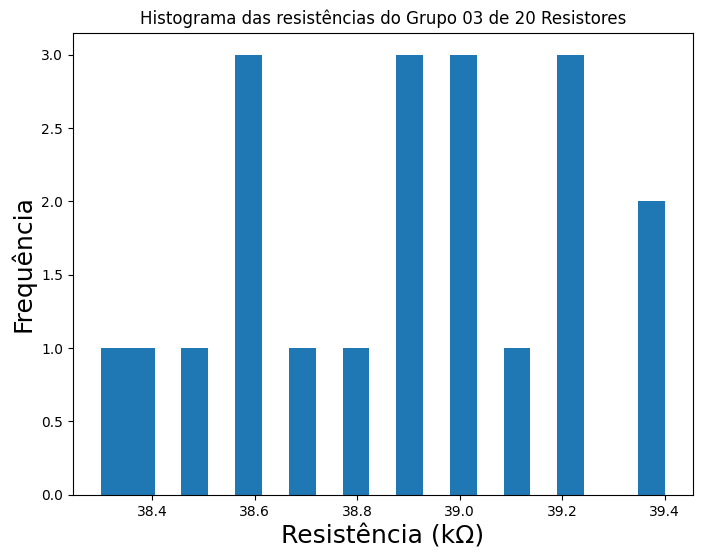

In [31]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR03, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 03 de 20 Resistores', fontsize=12 )


In [32]:
var_gr3 = np.var( array_GR03, ddof=1 )
print ( "Variância do Grupo 03: {}".format(var_gr3), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 03: {}".format(np.sqrt(var_gr3)),"(kΩ)" )
sigma_m3 = np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)
print ( "Erro da média do Grupo 03: {}".format(np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)),"(kΩ)" )

Variância do Grupo 03: 0.10134210526315814 (k^2Ω)
Desvio Padrao do do Grupo 03: 0.318342748092615 (kΩ)
Erro da média do Grupo 03: 0.07118360248791786 (kΩ)


Estimativa Padrão GR03:

In [33]:
print ( "R3 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR03 ), 1 ), np.round( sigma_m3, 1 ) ) )


R3 = 39 ± 0 (kΩ)


#Grupo 04 de valores de resistências:

In [34]:
#Calculo da média
N4_20=len(array_GR04)
media_GR04=(np.sum(array_GR04)/N4_20)
vmin = np.min(array_GR04)
vmax = np.max(array_GR04)
amplitude_GR04=(np.max(array_GR04)-np.min(array_GR04))
print ( "Valor mínimo: {}".format( np.min(array_GR04) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR04) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR04 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 04: {}".format( (media_GR04)),"(kΩ)")

Valor mínimo: 38.4 (kΩ)
Valor máximo: 39.4 (kΩ)
Amplitude: 1.0 (kΩ)
média do conjunto de 20 resistências do Grupo 04: 38.78 (kΩ)


In [35]:
#Usando o NumPy
np.mean( array_GR04 )

38.78

Text(0.5, 1.0, 'Histograma das resistências do Grupo 04 de 20 Resistores')

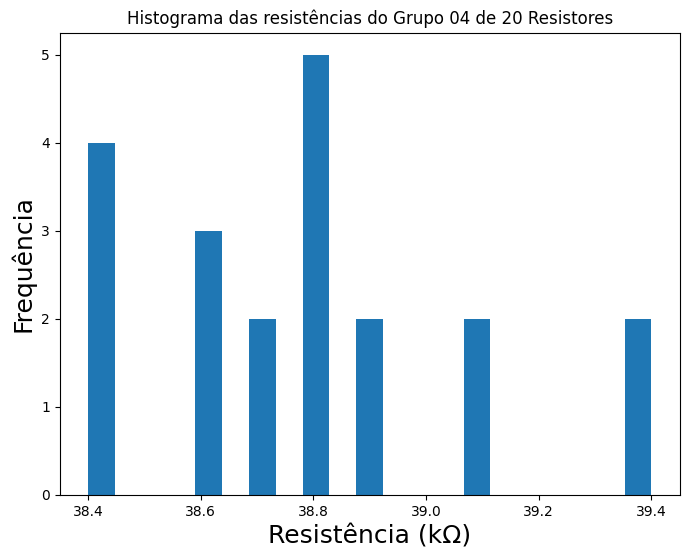

In [36]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR04, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 04 de 20 Resistores', fontsize=12 )


In [37]:
var_gr4 = np.var( array_GR04, ddof=1 )
print ( "Variância do Grupo 04: {}".format(var_gr4), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 04: {}".format(np.sqrt(var_gr4)),"(kΩ)" )
sigma_m4 = np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)
print ( "Erro da média do Grupo 04: {}".format(np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)),"(kΩ)" )

Variância do Grupo 04: 0.08905263157894731 (k^2Ω)
Desvio Padrao do do Grupo 04: 0.2984168754929039 (kΩ)
Erro da média do Grupo 04: 0.06672804192352241 (kΩ)


Estimativa Padrão GR04:

In [38]:
print ( "R4 = {:.1f} ± {:.1f} (kΩ)".format( np.round( np.mean( array_GR04 ), 1 ), np.round( sigma_m4, 1 ) ) )


R4 = 38.8 ± 0.1 (kΩ)


#Grupo 05 de valores de resistências:


In [39]:
#Calculo da média
N5_20=len(array_GR05)
media_GR05=(np.sum(array_GR05)/N5_20)
vmin = np.min(array_GR05)
vmax = np.max(array_GR05)
amplitude_GR05=(np.max(array_GR05)-np.min(array_GR05))
print ( "Valor mínimo: {}".format( np.min(array_GR05) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR05) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR05 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 05: {}".format( (media_GR05)),"(kΩ)")

Valor mínimo: 38.2 (kΩ)
Valor máximo: 39.4 (kΩ)
Amplitude: 1.1999999999999957 (kΩ)
média do conjunto de 20 resistências do Grupo 05: 38.83 (kΩ)


In [40]:
#Usando o NumPy
np.mean( array_GR05 )

38.83

Text(0.5, 1.0, 'Histograma das resistências do Grupo 05 de 20 Resistores')

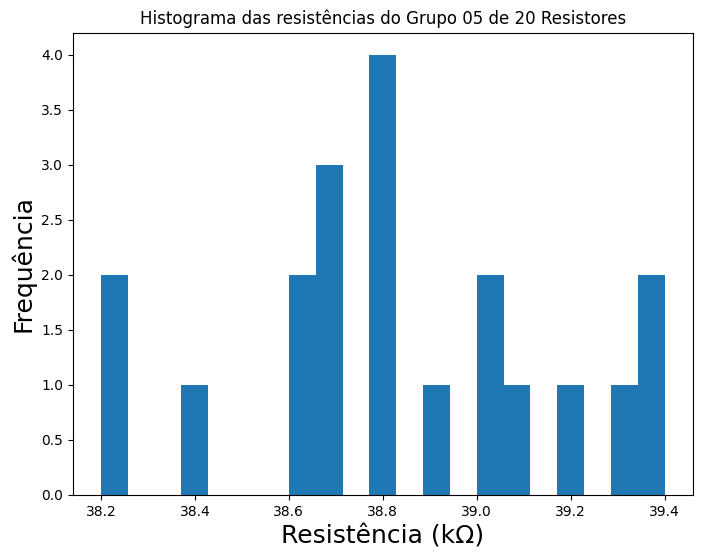

In [41]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR05, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 05 de 20 Resistores', fontsize=12 )

In [42]:
var_gr5 = np.var( array_GR05, ddof=1 )
print ( "Variância do Grupo 05: {}".format(var_gr5), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 05: {}".format(np.sqrt(var_gr5)),"(kΩ)" )
sigma_m5 = np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)
print ( "Erro da média do Grupo 05: {}".format(np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)),"(kΩ)" )

Variância do Grupo 05: 0.1201052631578941 (k^2Ω)
Desvio Padrao do do Grupo 05: 0.34656206249082444 (kΩ)
Erro da média do Grupo 05: 0.07749363301520135 (kΩ)


Estimativa Padrão GR05:


In [43]:
print ( "R5 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR05 ), 1 ), np.round( sigma_m5, 1 ) ) )


R5 = 39 ± 0 (kΩ)


#Média das Médias:

In [44]:
array_GRM = [np.mean( array_GR01 ),np.mean( array_GR02 ),np.mean( array_GR03 ),np.mean( array_GR04),np.mean( array_GR05)] #kΩ

In [45]:
N=len(array_GRM)
media_GRM=(np.sum(array_GRM)/N)
vmin = np.min(array_GRM)
vmax = np.max(array_GRM)
amplitude_GRM=(np.max(array_GRM)-np.min(array_GRM))
print ( "Valor mínimo: {}".format( np.min(array_GRM) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GRM) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GRM ),"(kΩ)" )
print("média do conjunto das médias das resistências: {}".format( (media_GRM)),"(kΩ)")

Valor mínimo: 38.78 (kΩ)
Valor máximo: 38.965 (kΩ)
Amplitude: 0.18500000000000227 (kΩ)
média do conjunto das médias das resistências: 38.864999999999995 (kΩ)


In [46]:
#Usando o NumPy
np.mean( array_GRM )

38.864999999999995

Text(0.5, 1.0, 'Histograma das resistências do grupo das médias')

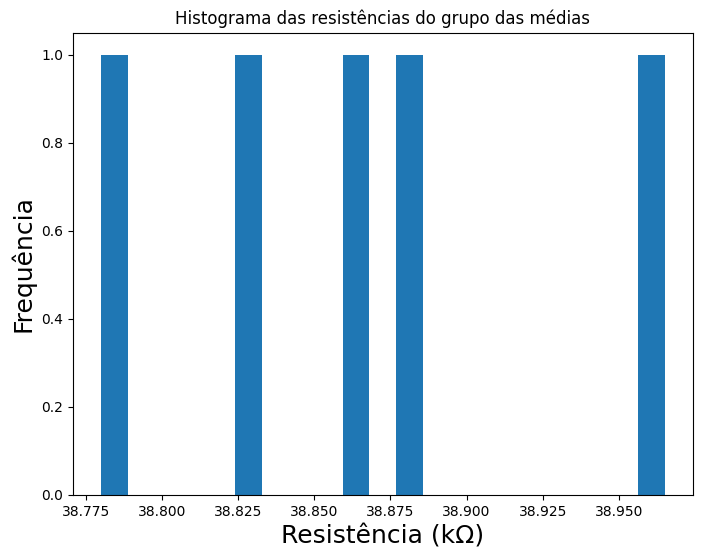

In [47]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GRM, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do grupo das médias', fontsize=12 )

In [48]:
var_grm = np.var( array_GRM, ddof=1 )
print ( "Variância do Grupo das médias: {}".format(var_grm), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo das médias: {}".format(np.sqrt(var_grm)),"(kΩ)" )
sigma_m = np.std( array_GRM, ddof=1 )/np.sqrt(N)
print ( "Erro da média do Grupo das médias: {}".format(np.std( array_GRM, ddof=1 )/np.sqrt(N)),"(kΩ)" )

Variância do Grupo das médias: 0.004712500000000203 (k^2Ω)
Desvio Padrao do do Grupo das médias: 0.06864765108873137 (kΩ)
Erro da média do Grupo das médias: 0.03070016286601816 (kΩ)


Estimativa padrão do grupo das médias:

In [49]:
print ( "RM = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GRM ), 1 ), np.round( sigma_m, 1 ) ) )


RM = 39 ± 0 (kΩ)


#Desvio Padrão do conjunto com 100 resistores:


In [50]:
sigma_L_p = np.std( array_100, ddof=0 )
print ( "Desvio padrão populacional (kΩ) = {}".format(sigma_L_p  ) )

sigma_L_a = np.std( array_100, ddof=1 )
print ( "Desvio padrão amostral (kΩ) = {}".format(sigma_L_a  ) )



Desvio padrão populacional (kΩ) = 0.3150793550837627
Desvio padrão amostral (kΩ) = 0.3166666666666664


#Erro Relativo:

In [51]:
erro_relativo100 = sigma_m100 / media_100
print ( "Erro relativo das medidas dos 100 resistores = {}".format( erro_relativo100*100 ),"(kΩ)" )
erro_relativo1 = sigma_m1/ media_GR01
print ( "Erro relativo das medidas do grupo 1 = {}".format( erro_relativo1*100  ),"(kΩ)" )
erro_relativo2 = sigma_m2/ media_GR02
print ( "Erro relativo das medidas do grupo 2 = {}".format( erro_relativo2*100  ),"(kΩ)" )
erro_relativo3 = sigma_m3/ media_GR03
print ( "Erro relativo das medidas do grupo 3 = {}".format( erro_relativo3*100  ),"(kΩ)" )
erro_relativo4 = sigma_m4/ media_GR04
print ( "Erro relativo das medidas do grupo 4 = {}".format( erro_relativo4*100  ),"(kΩ)" )
erro_relativo5 = sigma_m5/ media_GR05
print ( "Erro relativo das medidas do grupo 5 = {}".format( erro_relativo5*100  ),"(kΩ)" )
erro_relativoM = sigma_m/ media_GRM
print ( "Erro relativo das medidas do grupo das médias = {}".format( erro_relativoM*100  ),"(kΩ)" )

Erro relativo das medidas dos 100 resistores = 0.08107020586228297 (kΩ)
Erro relativo das medidas do grupo 1 = 0.18736982228607915 (kΩ)
Erro relativo das medidas do grupo 2 = 0.16828407370194945 (kΩ)
Erro relativo das medidas do grupo 3 = 0.1830618554401899 (kΩ)
Erro relativo das medidas do grupo 4 = 0.1720681844340444 (kΩ)
Erro relativo das medidas do grupo 5 = 0.1995715503868178 (kΩ)
Erro relativo das medidas do grupo das médias = 0.07899179947515288 (kΩ)


#Razão entre os erros das médias de cada grupo e o erro da média do conjunto completo:

In [52]:
erro_r1 = sigma_m1/sigma_m100 
print ( "Razão do sigma_m1/sigma_m100   = {}".format( erro_r1 ) )

erro_r2 = sigma_m2/sigma_m100  
print ( "Razão do sigma_m2/sigma_m100   = {}".format( erro_r2 ))

erro_r3 = sigma_m3/sigma_m100 
print ( "Razão do sigma_m3/sigma_m100   = {}".format( erro_r3 ))

erro_r4 = sigma_m4/sigma_m100 
print ( "Razão do sigma_m4/sigma_m100   = {}".format( erro_r4 ) )

erro_r5 = sigma_m5/sigma_m100 
print ( "Razão do sigma_m5/sigma_m100   = {}".format( erro_r5 ) )

Razão do sigma_m1/sigma_m100   = 2.317151221614049
Razão do sigma_m2/sigma_m100   = 2.0757819955190437
Razão do sigma_m3/sigma_m100   = 2.259227757686439
Razão do sigma_m4/sigma_m100   = 2.1178170148844884
Razão do sigma_m5/sigma_m100   = 2.4594957354346474


#Compatibilidades

In [53]:
print("O grupo de 100 é ou não compatível com o R de ref.:",compatibilidadeRef(array_100))

Incompatível 4.284634896631544 0.03150793550837627 0.13500000000000512
O grupo de 100 é ou não compatível com o R de ref.: 4.284634896631544


In [54]:
print("O grupo 01 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR01))

Compatível 1.2575867623059158 0.07951737645253847 0.10000000000000853
O grupo 01 é  ou não compatível com o grupo de 100: 1.2575867623059158


In [55]:
print("O grupo 02 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR02))

Compatível 0.0 0.07259739374762249 0.0
O grupo 02 é  ou não compatível com o grupo de 100: 0.0


In [56]:
print("O grupo 03 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR03))

Compatível 0.25692056592900864 0.07784507218288068 0.020000000000010232
O grupo 03 é  ou não compatível com o grupo de 100: 0.25692056592900864


In [57]:
print("O grupo 04 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR04))

Compatível 1.151873446355915 0.07379282877724205 0.08499999999999375
O grupo 04 é  ou não compatível com o grupo de 100: 1.151873446355915


In [58]:
print("O grupo 05 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR05))

Compatível 0.41838939417122384 0.08365412815811724 0.03499999999999659
O grupo 05 é  ou não compatível com o grupo de 100: 0.41838939417122384
